# MLPs and the XOR problem

In [1]:
import os
#Load Cuda libs
os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
from random import randint
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
assert tf.config.list_physical_devices('GPU'), 'No GPU detected, proceeding with CPU'

In [3]:
#XOR
number_of_training_examples = 100
def make_xor_sequence(n=number_of_training_examples):
    data = np.array([[randint(0,1),randint(0,1)]  for _ in range(n)]) # Input
    labels = np.bitwise_xor(data[:,0],data[:,1]) # Output
    labels = labels.reshape(len(labels),1)
    return data, labels

train_data, train_labels = make_xor_sequence()
validation_data, validation_labels = make_xor_sequence()

In [4]:
#train_data#.reshape(20000)

In [5]:
#train_labels

In [6]:
print(f'input_shape: {train_data.shape} output_shape: {train_labels.shape}')

input_shape: (100, 2) output_shape: (100, 1)


In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2))) #Input layer
model.add(tf.keras.layers.Flatten())

#Hidden layers
#model.add(tf.keras.layers.Dense(10, activation=None)) #Linear
model.add(tf.keras.layers.Dense(10, activation='relu')) #Non-linear
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #Output layer for classification
#model.add(tf.keras.layers.Dense(1, activation=None)) #Output layer for regression

In [8]:
#Compile model for classification
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'],
             optimizer=tf.keras.optimizers.Adam())
#Compile model for classification
#model.compile(loss=tf.keras.losses.MeanSquaredError(),
#             metrics=['mae'],
#             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [10]:
#early stopping for classification tasks
#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor="val_accuracy",patience=2)

#early stopping for regression tasks
#early_stopping = tf.keras.callbacks.EarlyStopping(
#    monitor="val_mae",patience=2)


history = model.fit(train_data, train_labels, batch_size=10, epochs=500, validation_data=(validation_data, validation_labels))

Epoch 1/500
10/10 [==============================] - 1s 13ms/step - loss: 0.6922 - accuracy: 0.3200 - val_loss: 0.7119 - val_accuracy: 0.2300
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.3000 - val_loss: 0.7059 - val_accuracy: 0.2300
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.3000 - val_loss: 0.7010 - val_accuracy: 0.2300
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6800 - accuracy: 0.3000 - val_loss: 0.6965 - val_accuracy: 0.2300
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.3000 - val_loss: 0.6913 - val_accuracy: 0.2300
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.3000 - val_loss: 0.6869 - val_accuracy: 0.2300
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6691 - accuracy: 0.4300 - val_loss: 0.6834 - val_accuracy: 0.4900
Epoch 8/500


Epoch 59/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4391 - accuracy: 1.0000 - val_loss: 0.4479 - val_accuracy: 1.0000
Epoch 60/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 1.0000 - val_loss: 0.4434 - val_accuracy: 1.0000
Epoch 61/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 1.0000 - val_loss: 0.4389 - val_accuracy: 1.0000
Epoch 62/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 1.0000 - val_loss: 0.4344 - val_accuracy: 1.0000
Epoch 63/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 1.0000
Epoch 64/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 1.0000 - val_loss: 0.4253 - val_accuracy: 1.0000
Epoch 65/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 1.0000 - val_loss: 0.4205 - val_accuracy: 1.0000
Epoch 

10/10 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 1.0000
Epoch 117/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 1.0000
Epoch 118/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 1.0000 - val_loss: 0.2388 - val_accuracy: 1.0000
Epoch 119/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 1.0000
Epoch 120/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 1.0000
Epoch 121/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 1.0000
Epoch 122/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2163 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 1.0000
Epoch 123/500

10/10 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 1.0000
Epoch 174/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1356 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 175/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 1.0000 - val_loss: 0.1462 - val_accuracy: 1.0000
Epoch 176/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1335 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 1.0000
Epoch 177/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 1.0000
Epoch 178/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 1.0000
Epoch 179/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 180/500

10/10 [==============================] - 0s 4ms/step - loss: 0.0903 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 1.0000
Epoch 231/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 1.0000
Epoch 232/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 1.0000 - val_loss: 0.0981 - val_accuracy: 1.0000
Epoch 233/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 1.0000
Epoch 234/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 1.0000
Epoch 235/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 1.0000 - val_loss: 0.0963 - val_accuracy: 1.0000
Epoch 236/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 1.0000
Epoch 237/500

10/10 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 1.0000
Epoch 288/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 289/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 0.0691 - val_accuracy: 1.0000
Epoch 290/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 1.0000
Epoch 291/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 1.0000
Epoch 292/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 0.0679 - val_accuracy: 1.0000
Epoch 293/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 294/500

10/10 [==============================] - 0s 4ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 1.0000
Epoch 345/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0453 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 346/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0451 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 1.0000
Epoch 347/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 348/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 349/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 350/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 351/500

10/10 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 402/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 403/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 404/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 405/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 406/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 407/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 408/500

10/10 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 459/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 460/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0282 - val_accuracy: 1.0000
Epoch 461/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 462/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 463/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 464/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 465/500

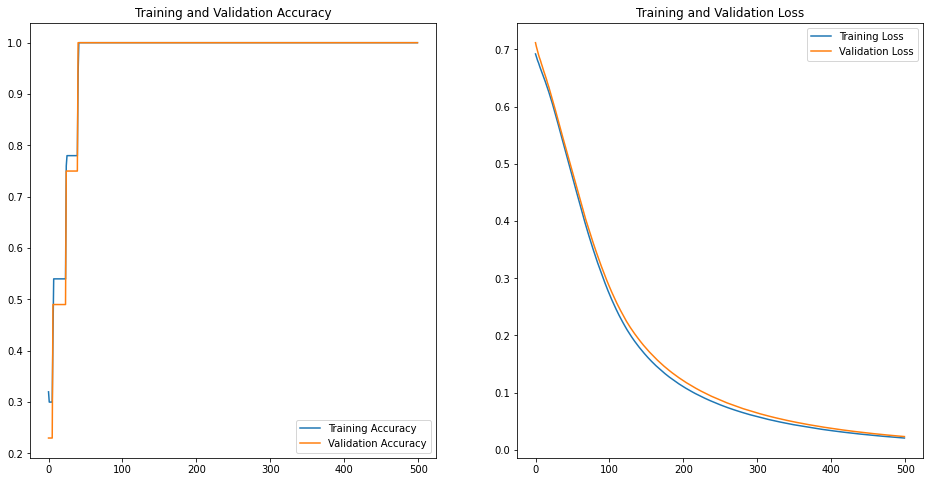

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
test = np.array([[0,0]])
test.shape                

(1, 2)

In [28]:
prediction = model.predict(test)

In [29]:
int(np.around(prediction[0][0]))

0